Sum of squared error: 291.489995245419


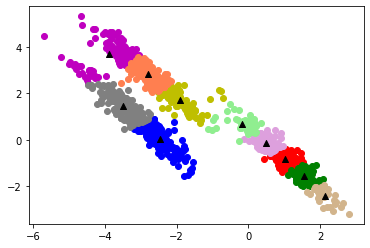

In [8]:
# Clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset.csv',names=['x','y'])  
X=np.array(df['x']) #To represent x coordinates
X=np.around(X,decimals=3)
Y=np.array(df['y']) #To represent y coordinates
Y=np.around(Y,decimals=3)
k=10    
# We can change the k value: To change the no of clusters
centroid={}           #Initial centroids                                                                                                                                                                                             
for i in range(k):
    j=np.random.randint(1,1000)
    centroid[i]=[X[j],Y[j]]     # Randomnly selecting K centroid

def Eucl_dist_square(x,y,x1,y1):       #Function to compute square of euclidian distance
    return (x-x1)**2+(y-y1)**2

C_array=[]      #Cluster to each data_point
for i in range(k):
    C_array.append([0,0])   #Initializing

def K_means(x_data,y_data,K,c,c_array):     #K_means function for Question 1
    f=1
    colmap={1:'r',2:'g',3:'b',4:'m',5:'y',6:'grey',7:'tan',8:'plum',9:'lightgreen',10:'coral'}
    while(f>0):    #Condition to check all the centres have converged or not
        f=0
        for k in range(K):     #To find the datapoints near a Centroid.
            C_k=[]
            for i in range(len(x_data)):
                dist=Eucl_dist_square(c[k][0],c[k][1],x_data[i],y_data[i])
                min_count=0
                mind=dist
                for ik in range(K):
                    if(k!=ik):
                        d=Eucl_dist_square(c[ik][0],c[ik][1],x_data[i],y_data[i])
                        if(d<mind):
                            mind=d
                            min_count+=1
                if min_count==0:
                    C_k.append([x_data[i],y_data[i]])   #To append closest datapoints to te centroid
            if len(C_k)>0:
                sumx=0
                sumy=0
                prev_x=c[k][0]
                prev_y=c[k][1]
                for j in range(len(C_k)):
                    sumx+=C_k[j][0]
                    sumy+=C_k[j][1]
                c[k][0]=sumx/(len(C_k))
                c[k][1]=sumy/(len(C_k))
                if prev_x!=c[k][0] or prev_y!=c[k][1]:   #if there is no change in the centroid
                    f+=1 
                c_array[k]=C_k
            else:
                c_array[k]=C_k
    sm_sq_er=0
    for i in range(K):
        for j in range(len(C_array[i])):
            sm_sq_er+=Eucl_dist_square(c_array[i][j][0],c_array[i][j][1],c[i][0],c[i][1])
    return c,c_array,sm_sq_er;
SSE=0
(centroid,C_array,SSE)=K_means(df['x'],df['y'],k,centroid,C_array)
print("Sum of squared error:",SSE)
colmap={1:'r',2:'g',3:'b',4:'m',5:'y',6:'grey',7:'tan',8:'plum',9:'lightgreen',10:'coral'}
for i in range(k):          #For plotting clusters
    for j in range(len(C_array[i])):
        plt.scatter(C_array[i][j][0],C_array[i][j][1],color=colmap[i+1])
for i in centroid.keys():
    plt.scatter(*centroid[i],marker='^',color='black')  #The black triangle represents the centroid of each triangle
plt.show()

The initial centroids for part[i]: {0: [-0.1, 0], 1: [0.1, 0]}
The new centroids are: {0: [-0.4184836193743485, 0.0], 1: [0.5408036495144208, 0.0]}


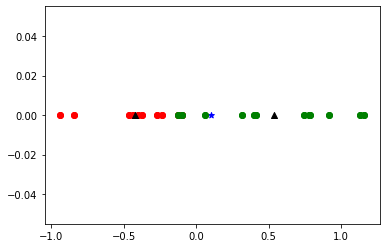

The new centroids are: {0: [-0.375098095875949, 0.0], 1: [0.7392456593287952, 0.0]}


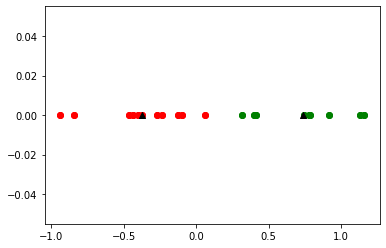

The final centroids of clusters for [i] are: {0: [-0.375098095875949, 0.0], 1: [0.7392456593287952, 0.0]} 

The initial centroids for part[ii]: {0: [0, 0], 1: [3.5, 0]}
The new centroids are: {0: [0.12635659396618568, 0.0], 1: [3.5, 0]}


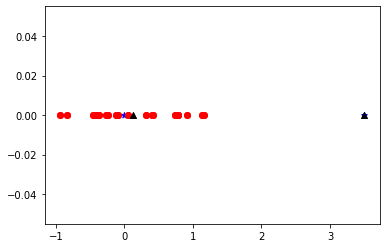

The final centroids of clusters for [ii] are: {0: [0.12635659396618568, 0.0], 1: [3.5, 0]} 

For the second part:

The initial centroids for part[b]: {0: [0.12635659396618568, 0.0], 1: [3.5, 0]}
The new centroids are: {0: [0.12635659396618568, 0.0], 1: [3.0568848100597577, 0.0]}


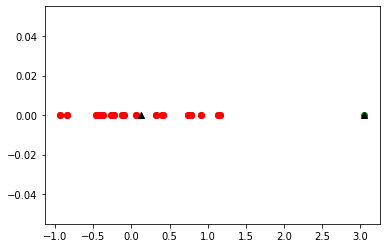

The final centroids of clusters are: {0: [0.12635659396618568, 0.0], 1: [3.0568848100597577, 0.0]} 

The initial centroids for part[b]: {0: [-0.1, 0], 1: [0.1, 0]}
The new centroids are: {0: [-0.4184836193743485, 0.0], 1: [0.6414468959362343, 0.0]}


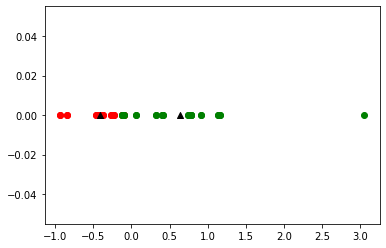

The new centroids are: {0: [-0.375098095875949, 0.0], 1: [0.8612266672620037, 0.0]}


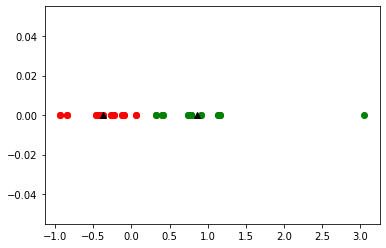

The final centroids of clusters are: {0: [-0.375098095875949, 0.0], 1: [0.8612266672620037, 0.0]} 



In [9]:
#Q2)
#Instead of 2 dimensional , I am taking y as a constant and using the same function as in the previous question
import numpy as np
import matplotlib.pyplot as plt
Data_new=[]
x_new=[]
y_new=[]
for i in range(20):
    Data_new.append([np.random.uniform(-1,1),0])
    x_new.append(Data_new[i][0])
    y_new.append(0)
    Data_new.append([np.random.uniform(-0.5,1.5),0])
    x_new.append(Data_new[i][0])
    y_new.append(0)

def Eucl_dist_square(x,y,x1,y1):       #Function to compute square of euclidian distance
    return (x-x1)**2+(y-y1)**2

SSE=[]
new_centroid={}
new_centroid[0]=[-0.1,0]      #initial centroid as given in question
new_centroid[1]=[0.1,0]
k=2
for i in new_centroid.keys():           #Blue star in plot represents the initial centroids
    plt.scatter(*new_centroid[i],marker='*',color='b')
C_array=[]      #Cluster to each data_point
for i in range(k):
    C_array.append([0,0])   #Initializing

def K_means_Scatter(x_data,y_data,K,c,c_array):     #K_means function for Question 1
    f=1
    sm_sq_er=[]
    colmap={1:'r',2:'g',3:'b',4:'m',5:'y',6:'grey',7:'tan',8:'plum',9:'lightgreen',10:'coral'}
    while (f>0):    #Condition to check all the centres have converged or not
        f=0
        for k in range(K):     #To find the datapoints near a Centroid.
            C_k=[]
            for i in range(len(x_data)):
                dist=Eucl_dist_square(c[k][0],c[k][1],x_data[i],y_data[i])
                min_count=0
                mind=dist
                for ik in range(K):
                    if(k!=ik):
                        d=Eucl_dist_square(c[ik][0],c[ik][1],x_data[i],y_data[i])
                        if(d<mind):
                            mind=d
                            min_count+=1
                if min_count==0:
                    C_k.append([x_data[i],y_data[i]])   #To append closest datapoints to te centroid
            if len(C_k)>0:
                sumx=0
                sumy=0
                prev_x=c[k][0]
                prev_y=c[k][1]
                for j in range(len(C_k)):
                    sumx+=C_k[j][0]
                    sumy+=C_k[j][1]
                c[k][0]=sumx/(len(C_k))
                c[k][1]=sumy/(len(C_k))
                if prev_x!=c[k][0] or prev_y!=c[k][1]:   #if there is no change in the centroid
                    f+=1 
                c_array[k]=C_k
            else:
                c_array[k]=C_k
        if f!=0:
            print("The new centroids are:",c)
            #For plotting in each case of iteration
            for i in range(K):          
                for j in range(len(c_array[i])):
                    plt.scatter(c_array[i][j][0],c_array[i][j][1],color=colmap[i+1])
            for i in c.keys():
                plt.scatter(*c[i],marker='^',color='black')   #The new centroid of the cluster 
            plt.show()
        S=0
        for i in range(k):
            for j in range(len(c_array[i])):
                S+=Eucl_dist_square(c_array[i][j][0],c_array[i][j][1],c[i][0],c[i][1])
        sm_sq_er.append(S)
    return c,c_array,sm_sq_er;
print("The initial centroids for part[i]:",new_centroid)
(new_centroid,C_array,SSE)=K_means_Scatter(x_new,y_new,2,new_centroid,C_array)
print("The final centroids of clusters for [i] are:",new_centroid,"\n")

new_centroid={}
new_centroid[0]=[0,0]      #initial centroid as given in question
new_centroid[1]=[3.5,0]
for i in new_centroid.keys():           #Blue star in plot represents the initial centroids
    plt.scatter(*new_centroid[i],marker='*',color='b')
print("The initial centroids for part[ii]:",new_centroid)
(new_centroid,C_array,SSE)=K_means_Scatter(x_new,y_new,2,new_centroid,C_array)
print("The final centroids of clusters for [ii] are:",new_centroid,"\n")

# For b part of 2 nd question :
print("For the second part:\n")
# We will be adding a new data point
Data_new.append([np.random.uniform(3,4),0])
x_new.append(Data_new[40][0])
y_new.append(0)
print("The initial centroids for part[b]:",new_centroid)
(new_centroid,C_array,SSE)=K_means_Scatter(x_new,y_new,2,new_centroid,C_array)
print("The final centroids of clusters are:",new_centroid,"\n")
#Taking some other initial centroids.
new_centroid={}
new_centroid[0]=[-0.1,0]      #initial centroid as given in question
new_centroid[1]=[0.1,0]
print("The initial centroids for part[b]:",new_centroid)
(new_centroid,C_array,SSE)=K_means_Scatter(x_new,y_new,2,new_centroid,C_array)
print("The final centroids of clusters are:",new_centroid,"\n")

When performing K means clustering using new datapoints the centroids of clusters were shifted accordingly, the clusters were found correctly.

The initial centroids : {0: [6.183402387528507, 41.96926734365799], 1: [4.1114551209099925, 23.95257675353121], 2: [3.3736707336423017, 32.179124431561455]}
The new centroids are: {0: [5.537507608732424, 52.76562914615731], 1: [2.882583334524609, 23.988220132058295], 2: [4.537296878573888, 35.38544370293041]}


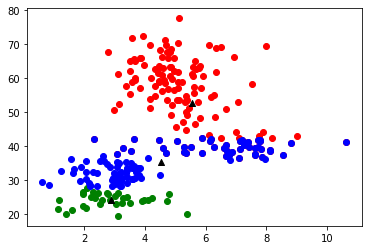

The new centroids are: {0: [4.978361220317822, 59.48047029823004], 1: [2.733529004818955, 25.488430868543333], 2: [5.133777618690071, 37.48679170129489]}


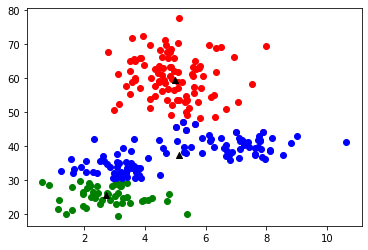

The new centroids are: {0: [4.88736081588816, 60.63122341111154], 1: [2.838788863399513, 26.43111582910955], 2: [5.438185173133059, 38.70063892414835]}


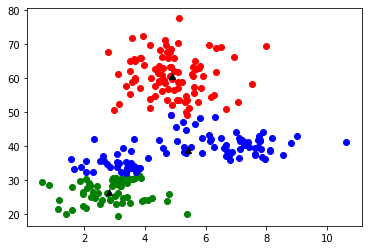

The new centroids are: {0: [4.8820013186324696, 60.88508756106789], 1: [2.829840074671614, 27.336395449149112], 2: [5.647965609460505, 39.31654447656913]}


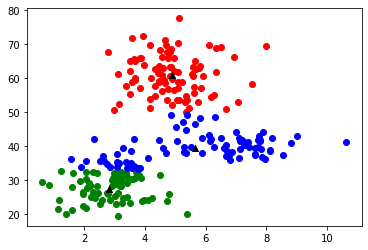

The new centroids are: {0: [4.876890170426333, 61.00540331729821], 1: [2.852581529982408, 27.72955370215289], 2: [5.846120498334604, 39.94505202021268]}


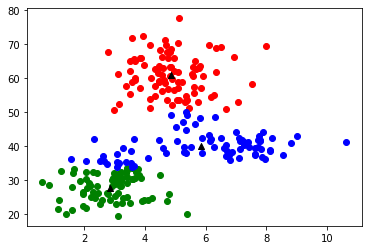

The new centroids are: {0: [4.876890170426333, 61.00540331729821], 1: [2.876758565062262, 28.177053336792376], 2: [5.9097900741587335, 40.09755800101991]}


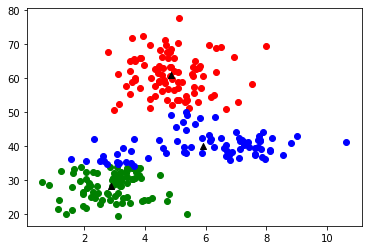

The new centroids are: {0: [4.876890170426333, 61.00540331729821], 1: [2.8862731526835304, 28.251104910451083], 2: [5.9386725783145335, 40.17253589363805]}


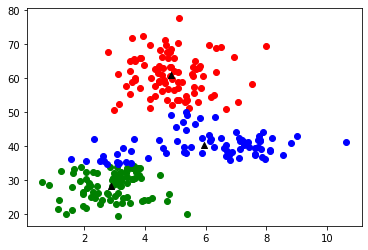

The final centroids of clusters are: {0: [4.876890170426333, 61.00540331729821], 1: [2.8862731526835304, 28.251104910451083], 2: [5.9386725783145335, 40.17253589363805]} 

SSE: [19045.319578783252, 5655.493032682658, 4298.878686885239, 4343.55010709773, 4390.821832900829, 4597.05973460692, 4634.083324847317, 4634.083324847317]


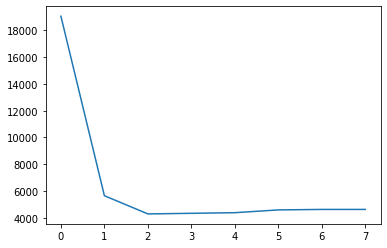

In [15]:
#   Q3)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
height=[]
weight=[]
for i in range(100):            #For the height and weights of the kids
    height.append(np.random.normal(5,1.1))
    weight.append(np.random.normal(60,7))
for i in range(100):            #For the height and weights of the Adults
    height.append(np.random.normal(3,1))
    weight.append(np.random.normal(30,5))
for i in range(50):            #For the height and weights of the Aliens
    height.append(np.random.normal(7,1))
    weight.append(np.random.normal(40,2))
k=3
centroid={}           #Initial centroids                                                                                                                                                                                             
for i in range(k):
    j=np.random.randint(1,251)
    centroid[i]=[height[j],weight[j]] 
SSE=[]
C_array=[]      #Cluster to each data_point
for i in range(k):
    C_array.append([0,0])   #Initializing
print("The initial centroids :",centroid)
(centroid,C_array,SSE)=K_means_Scatter(height,weight,k,centroid,C_array)
print("The final centroids of clusters are:",centroid,"\n")
print("SSE:",SSE)
plt.plot(SSE)
plt.show()

3)b)  Yes, starting with distinct sets of intitial centroids leads us to distinct sets of clusters. Lets make two clustering with different initial points

The initial centroids : {0: [6.094891347342104, 42.58534331238589], 1: [3.3771416381256034, 28.780656486107322], 2: [8.986913775606807, 35.54131128537189]}
The final centroids of clusters are: {0: [5.018371200705408, 61.91573398347257], 1: [2.9486163952153013, 28.026026611199388], 2: [5.85970381189336, 39.82382762306869]} 



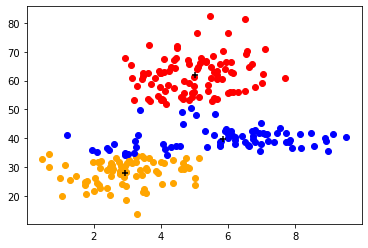

The initial centroids : {0: [7.099506741700479, 41.29873926782844], 1: [2.669368945263176, 33.2511839643356], 2: [3.3228760508937896, 41.25069721873244]}
The final centroids of clusters are: {0: [5.018371200705408, 61.91573398347257], 1: [2.9636194317134814, 28.174407546250517], 2: [5.922401384550993, 39.97834795751383]} 



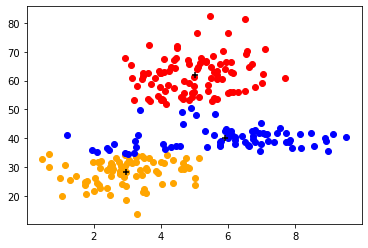

In [11]:
centroid={}           #Initial centroids of first clusterings                                                                                                                                                                                     
for i in range(k):
    j=np.random.randint(1,251)
    centroid[i]=[height[j],weight[j]] 
S=0
C_array=[]      #Cluster to each data_point
for i in range(k):
    C_array.append([0,0])   #Initializing
print("The initial centroids :",centroid)
(centroid,C_array,SSE)=K_means(height,weight,k,centroid,C_array)
print("The final centroids of clusters are:",centroid,"\n")
colmap={1:'r',2:'orange',3:'b',4:'g',5:'y'}
for i in range(k):          #For plotting clusters
    for j in range(len(C_array[i])):
        plt.scatter(C_array[i][j][0],C_array[i][j][1],color=colmap[i+1])
for i in centroid.keys():
    plt.scatter(*centroid[i],marker='+',color='black') 
plt.show()
centroid={}           #Initial centroids of second clusterings                                                                                                                                                                                     
for i in range(k):
    j=np.random.randint(1,251)
    centroid[i]=[height[j],weight[j]] 
S=0
C_array=[]      #Cluster to each data_point
for i in range(k):
    C_array.append([0,0])   #Initializing
print("The initial centroids :",centroid)
(centroid,C_array,SSE)=K_means(height,weight,k,centroid,C_array)
print("The final centroids of clusters are:",centroid,"\n")
for i in range(k):          #For plotting clusters
    for j in range(len(C_array[i])):
        plt.scatter(C_array[i][j][0],C_array[i][j][1],color=colmap[i+1])
for i in centroid.keys():
    plt.scatter(*centroid[i],marker='+',color='black') 
plt.show()
#WE can see that the clusters formed in each case is different from one another.Which depends on the position of initial centroids.

3)c) In k means algorithm we keep clustering until we find the lowest SSE and SSE of an iteration repeat with its next one. When the converging is completed.

3)d) If we dont change the initial centroids in each case or we always take initial k coordinates from the dataset as initial centroids, then in each case same clusters would be formed so that for a given k the results would be same in the succesive runs.

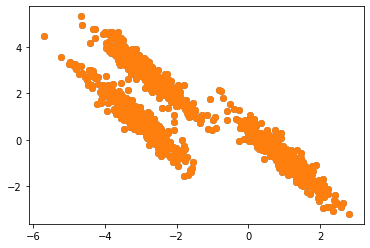

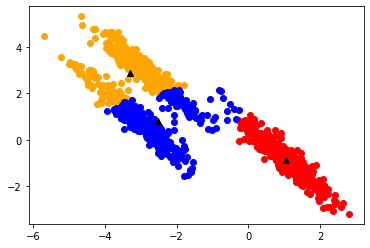

In [12]:
#Question 4)a)
plt.scatter(df['x'],df['y'])
centroid={}           #Initial centroids                                                                                                                                                                                             
for i in range(k):
    j=np.random.randint(1,1000)
    centroid[i]=[X[j],Y[j]]     # Randomnly selecting K centroid
plt.scatter(df['x'],df['y'])
plt.show()
SSE=0
(centroid,C_array,SSE)=K_means(df['x'],df['y'],k,centroid,C_array)
colmap={1:'r',2:'orange',3:'b',4:'g',5:'y'}
for i in range(k):          #For plotting clusters
    for j in range(len(C_array[i])):
        plt.scatter(C_array[i][j][0],C_array[i][j][1],color=colmap[i+1])
for i in centroid.keys():
    plt.scatter(*centroid[i],marker='^',color='black')  #The black triangle represents the centroid of each triangle
plt.show()

4)a) The cluster didnt come as expected. I thught the clusters would be in different form as visually it seemed llike three different clusters in a different shape and centroid.

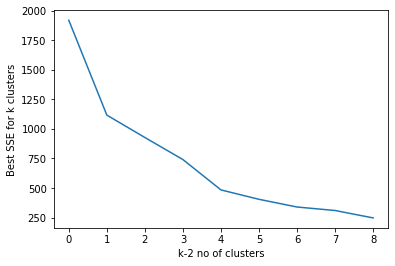

In [16]:
#  4)b)
SSE_best=[]
for i  in range(2,11):
    k=i
    C_array=[]      #Cluster to each data_point
    for i in range(k):
        C_array.append([0,0])   #Initializing
    centroid={}           #Initial centroids                                                                                                                                                                                             
    for i in range(k):
        j=np.random.randint(1,1000)
        centroid[i]=[X[j],Y[j]] 
    SSE=0
    (centroid,C_array,SSE)=K_means(df['x'],df['y'],k,centroid,C_array)
    SSE_best.append(SSE)
plt.xlabel("k-2 no of clusters")
plt.ylabel("Best SSE for k clusters")
plt.plot(SSE_best)
plt.show()